Import Libraries

In [163]:
import pandas as pd
import numpy as np

import warnings

import matplotlib.pyplot as plt

import seaborn as sns

In [164]:
warnings.filterwarnings('ignore')

### Data Description

Loading master data 

In [165]:
df = pd.read_csv('master.csv')
df.head()

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1_1,2/5/10,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1_1,2/12/10,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1_1,2/19/10,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1_1,2/26/10,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1_1,3/5/10,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


We want to see the dimension of our master dataset. It has 344667 rows and 15 columns.

In [166]:
df.shape


(344667, 15)

Now we want to check the missing values in the dataset. We have to use isna() function for checking missing values. We see that there are many missing values in markdown columns. As it is numeric columns, we want to replace missing values as zero.

In [167]:
df.isna().sum()

Store_Dept           0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270480
MarkDown2       278599
MarkDown3       276008
MarkDown4       278273
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [168]:
#Treating missing value as 0
df.fillna(0, inplace= True)

In [169]:
df.shape

(344667, 15)

In [170]:
df.isna().sum()

Store_Dept      0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

We would like to see the statistics of data

In [171]:
df.describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000
mean,16011.033071,57.391070,3.278793,1588.057498,1058.111573,560.259852,744.976707,1046.938687,170.260421,8.119909,136807.198011
std,22859.611439,18.644742,0.454502,5424.631426,5607.297589,6110.587750,3899.167100,3078.805701,38.767201,1.865077,60944.571069
min,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-1.000000,0.000000,0.000000,126.064000,4.125000,34875.000000
25%,2100.335000,43.820000,2.843000,0.000000,0.000000,0.000000,0.000000,0.000000,131.940807,7.082000,93638.000000
50%,7638.860000,58.060000,3.263000,0.000000,0.000000,0.000000,0.000000,0.000000,182.238988,7.951000,140167.000000
75%,20179.490000,71.240000,3.669000,0.000000,0.000000,0.000000,0.000000,0.000000,211.406287,8.622000,202505.000000
max,693099.360000,100.140000,4.294000,88646.760000,104519.540000,141630.610000,67474.850000,37581.270000,225.367254,14.313000,219622.000000


Now, let us check the data types. We use dtypes attributes to see features are of which datatype.

In [172]:
df.dtypes

Store_Dept       object
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

Categorical variables are: Store_Dept, Date, Type (multiclass) and IsHoliday(binary)
Numerical variables: Weekly_Sales. Temperature, Fuel_price, Markdown1, Markdown2, Markdown3, Markdown4, Markdown5, CPI, Unemploymeny, Size

**dummy coding**

In our dataset, date column is string and cannot be directly used in model, so we have seperated Year, month and week columns from Date column.

In [173]:
#prepare data- converting date
df['Date'] = pd.to_datetime(df['Date'], errors ='coerce')
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week']=df['Date'].dt.week

#df = df.drop(columns= ['Date'])

In [174]:
#df['Year']= 'Year_' + df['Year'].astype(str)
#df['Month']='Month_' + df['Month'].astype(str)
#df['Week']= 'Week_' + df['Week'].astype(str)

For Type column, there are three levels 'A', 'B', 'C'. We want to use dummy coding for Type. So we have created three dummy variables Type_A, Type_B, Type_C.

In [175]:
#Dummy for Type
df['Type'] = 'Type_'+ df['Type']
df_Type = pd.get_dummies(df['Type'])
df = pd.concat([df, df_Type], axis=1)

#Dummy for holiday

The store and Department columns are joined together in our dataset, we wanted to create two seperate columns for Store and Department

In [146]:
store_dept = df["Store_Dept"].str.split("_", n = 1, expand = True) 
 
# making separate first name column from new data frame 
df["Store"]= store_dept[0] 
  
# making separate last name column from new data frame 
df['Department']= store_dept[1] 
  
# Dropping old Name columns 
df.drop(columns =['Store_Dept'], inplace = True) 

df['Store'] = 'Store_' + df['Store']


df['Department'] = 'Dept_' + df['Department']
  

In [147]:
# holiday
df['Holiday']= df['IsHoliday'].apply(lambda x: '0' if x is False  else '1')
df['Holiday'] = "IsHoliday_" + df['Holiday']

df = df.drop(columns =['IsHoliday'])

In [148]:
df.head()

,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Size,Year,Month,Week,Type_A,Type_B,Type_C,Store,Department,Holiday
0,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,151315,2010,2,5,1,0,0,Store_1,Dept_1,IsHoliday_0
1,2010-02-12,46039.49,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,151315,2010,2,6,1,0,0,Store_1,Dept_1,IsHoliday_1
2,2010-02-19,41595.55,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,151315,2010,2,7,1,0,0,Store_1,Dept_1,IsHoliday_0
3,2010-02-26,19403.54,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,151315,2010,2,8,1,0,0,Store_1,Dept_1,IsHoliday_0
4,2010-03-05,21827.90,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,151315,2010,3,9,1,0,0,Store_1,Dept_1,IsHoliday_0


In [149]:
df.dtypes

Date            datetime64[ns]
Weekly_Sales           float64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Year                     int64
Month                    int64
Week                     int64
Type_A                   uint8
Type_B                   uint8
Type_C                   uint8
Store                   object
Department              object
Holiday                 object
dtype: object

### Exploratory Analysis

We want to explore all variables in our master dataset

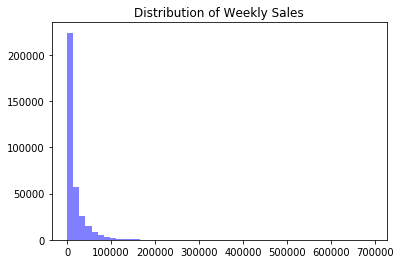

In [177]:
#x = df['Weekly_Sales']
df_nonzero = df[df['Weekly_Sales']>0]
x= df_nonzero['Weekly_Sales']
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distribution of Weekly Sales')
plt.show()

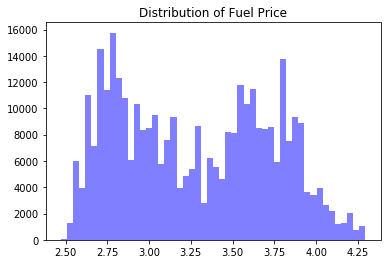

In [178]:
x = df['Fuel_Price']
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distribution of Fuel Price')
plt.show()

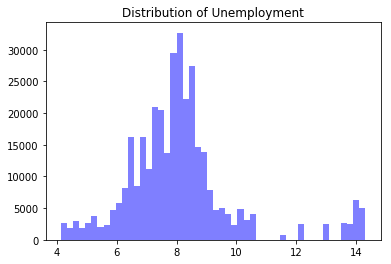

In [179]:
x = df['Unemployment']
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distribution of Unemployment')
plt.show()

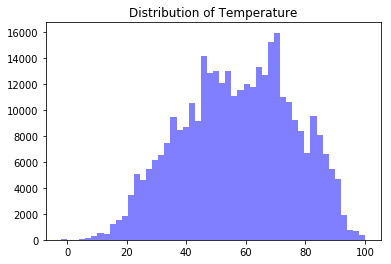

In [181]:
x = df['Temperature']
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distribution of Temperature')
plt.show()

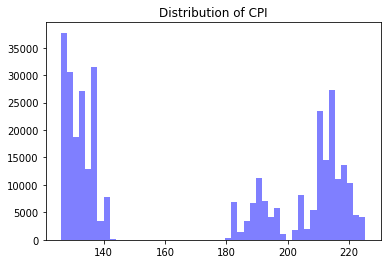

In [182]:
x = df['CPI']
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distribution of CPI')
plt.show()

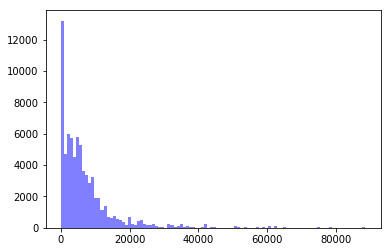

In [155]:
df_nonzero = df[df['MarkDown1']>0]
x= df_nonzero['MarkDown1']
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

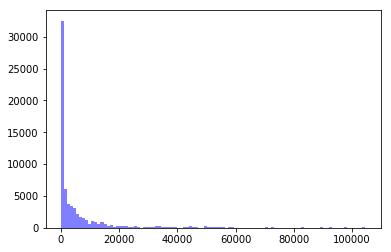

In [156]:
df_nonzero = df[df['MarkDown2']>0]
x= df_nonzero['MarkDown2']
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

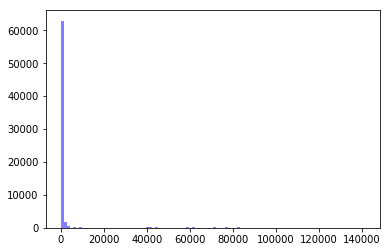

In [157]:
df_nonzero = df[df['MarkDown3']>0]
x= df_nonzero['MarkDown3']
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

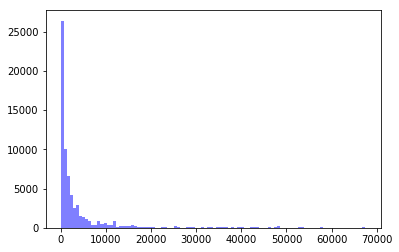

In [158]:
df_nonzero = df[df['MarkDown4']!=0]
x= df_nonzero['MarkDown4']
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

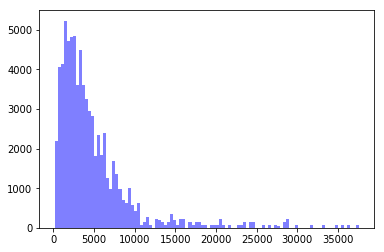

In [159]:
df_nonzero = df[df['MarkDown5']!=0]
x= df_nonzero['MarkDown5']
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

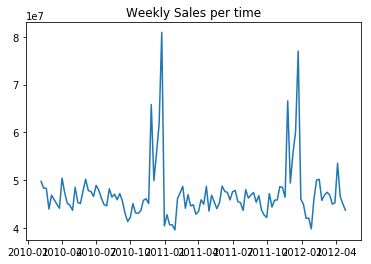

In [183]:
df_weekly_sales = df.groupby('Date').agg({'Weekly_Sales':'sum'})
#df_weekly_sales
plt.plot( df_weekly_sales['Weekly_Sales'])
plt.title('Weekly Sales per time')
plt.show()

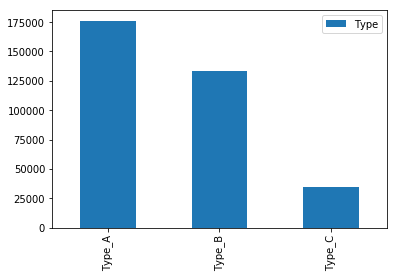

In [161]:
df_type = pd.DataFrame(df['Type'].value_counts())
df_type.plot(kind="bar")

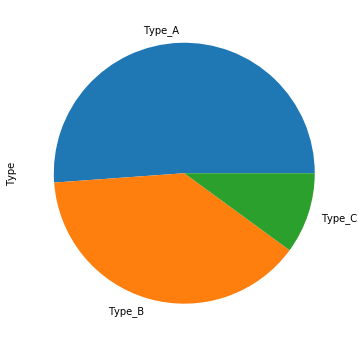

In [162]:
df_type = pd.Series(df['Type'].value_counts())
series.plot.pie(figsize=(6, 6))